✅ Dataset loaded: 86 samples, 13299 genes
📊 Training samples: 68, Testing samples: 18

✅ Accuracy: 1.0000
✅ ROC-AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



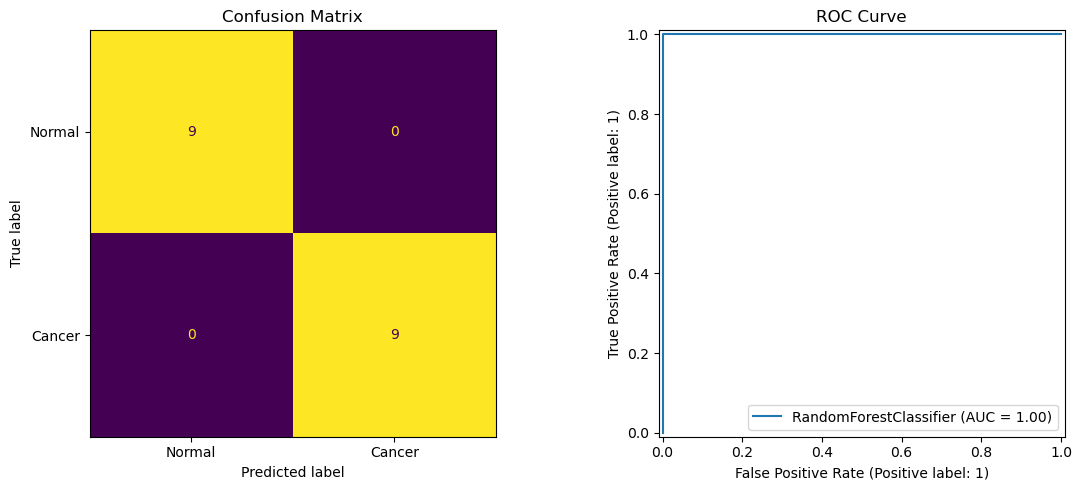


🔥 Top 20 Biomarker Genes:
                        Gene  Importance
261                   ADIPOQ    0.011420
1125                    BIN1    0.008713
5954                    KRT8    0.008168
5931                   KRT19    0.008125
8765                    PLK2    0.008075
8334                   PCDH9    0.008050
264                    ADIRF    0.007499
8761                   PLIN1    0.006705
488                  ANGPTL4    0.006610
6057                     LEP    0.006197
6363   LOC101930400///AKR1C2    0.006012
4757                   HCAR3    0.006003
6302    LOC101927733///HMGN1    0.006000
7321                  MTHFD2    0.005842
10141            SAA2///SAA1    0.005506
5596                   KANK1    0.005440
10722                SLC38A1    0.005278
11763                  TIMP4    0.004950
6466                     LPL    0.004863
2109                   CIDEC    0.004859


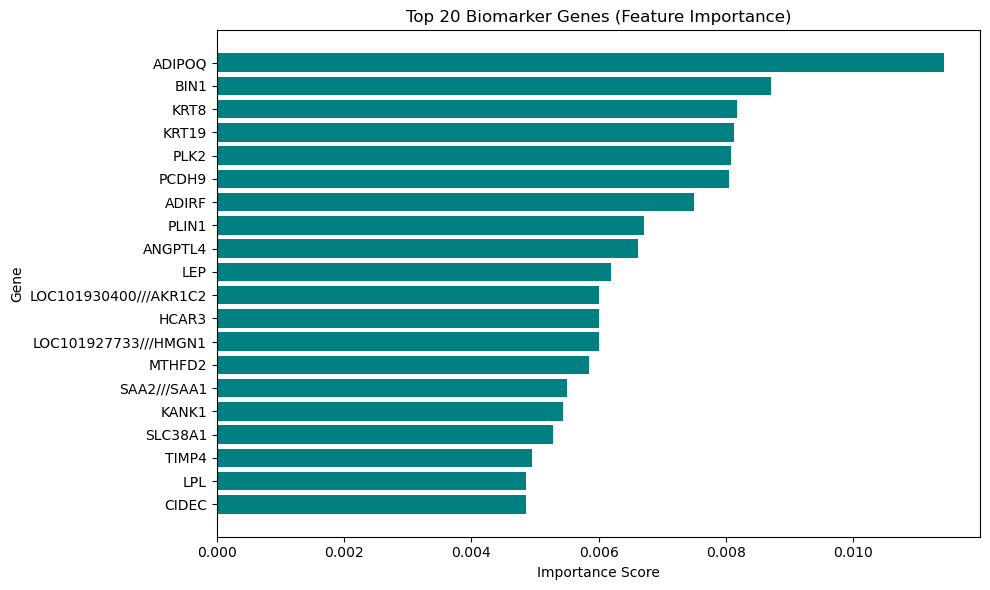


💾 Model saved as: ../models/breast_model.pkl
💾 Top biomarkers saved as: ../outputs/metrics/breast_top_genes.csv

🎯 Training complete — baseline breast model ready!


In [3]:
# ================================
# Breast Cancer Model Training + Biomarker Extraction
# ================================
import os
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay
)

# ----------------------------
# Step 1️⃣: Load the dataset
# ----------------------------
df = pd.read_csv("../data/labeled/breast_labeled.csv")

print(f"✅ Dataset loaded: {df.shape[0]} samples, {df.shape[1]-1} genes")

# Separate features and target
X = df.drop(columns=["status"])
y = df["status"]

# ----------------------------
# Step 2️⃣: Train-test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# ----------------------------
# Step 3️⃣: Train RandomForest model
# ----------------------------
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# ----------------------------
# Step 4️⃣: Evaluate the model
# ----------------------------
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"\n✅ Accuracy: {acc:.4f}")
print(f"✅ ROC-AUC: {roc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ----------------------------
# Step 5️⃣: Visualize Confusion Matrix and ROC
# ----------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Normal", "Cancer"]).plot(ax=ax[0], colorbar=False)
ax[0].set_title("Confusion Matrix")

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve")

plt.tight_layout()
plt.show()

# ----------------------------
# Step 6️⃣: Extract top biomarkers
# ----------------------------
feature_importances = pd.DataFrame({
    "Gene": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_genes = feature_importances.head(20)
print("\n🔥 Top 20 Biomarker Genes:")
print(top_genes)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_genes["Gene"], top_genes["Importance"], color="teal")
plt.gca().invert_yaxis()
plt.title("Top 20 Biomarker Genes (Feature Importance)")
plt.xlabel("Importance Score")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

# ----------------------------
# Step 7️⃣: Save model + biomarkers
# ----------------------------
os.makedirs("../outputs/metrics", exist_ok=True)  # ✅ Create folder if not present
os.makedirs("../models", exist_ok=True)  

joblib.dump(model, "../models/breast_model.pkl")
top_genes.to_csv("../outputs/metrics/breast_top_genes.csv", index=False)

print("\n💾 Model saved as: ../models/breast_model.pkl")
print("💾 Top biomarkers saved as: ../outputs/metrics/breast_top_genes.csv")
print("\n🎯 Training complete — baseline breast model ready!")



🔹 Training model for: Ovarian
📂 Using dataset: ../data/labeled\ovarian_labeled.csv
✅ Dataset loaded: 63 samples, 22189 genes
📊 Training samples: 50, Testing samples: 13
⚖️ Applying class_weight='balanced' (moderate imbalance ~5:1)

✅ Accuracy: 1.0000
✅ ROC-AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        11

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



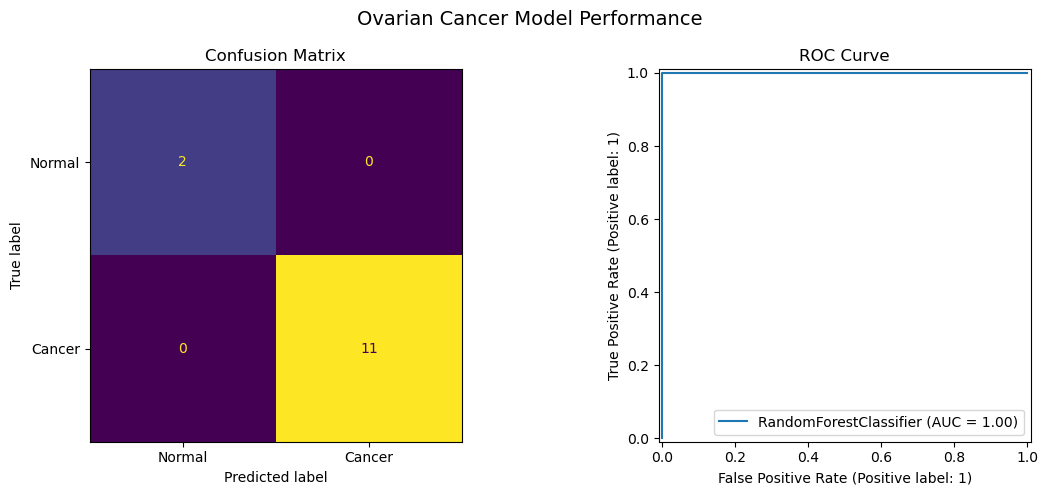


🔥 Top 10 Biomarkers (Ovarian):
               Gene  Importance
21209         WFDC2      0.0125
14239         OLFM2      0.0100
11216  LOC105370549      0.0100
487           AIF1L      0.0075
15795         PROCR      0.0075
9712      LINC01585      0.0075
4959          EFNA5      0.0075
7178      HAND2-AS1      0.0075
8943    L3MBTL4-AS1      0.0075
15211         PLCE1      0.0075


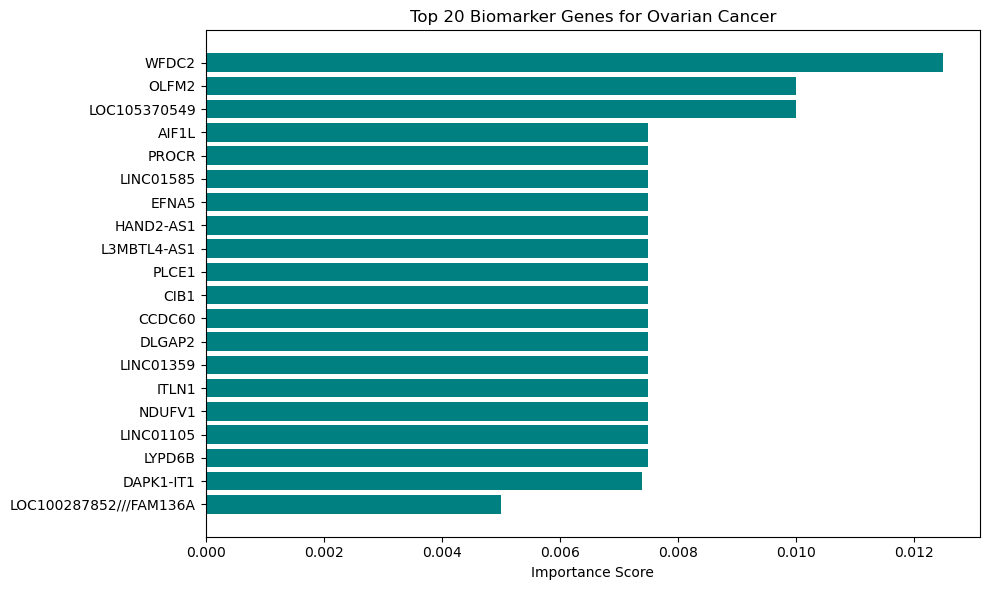


💾 Model saved as: ../models/ovarian_model.pkl
💾 Top biomarkers saved as: ../outputs/metrics/ovarian_top100_genes.csv
🎯 Ovarian model training complete!
🧬 Gene list saved as: ../models/ovarian_genes.json


In [7]:
# ================================
# Universal Cancer Model Trainer
# Supports: Breast, Ovarian, Lung
# Author: Sindhu S. Patil
# ================================
import os
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay
)
from imblearn.over_sampling import SMOTE

# ----------------------------
# Step 1️⃣: Configuration
# ----------------------------
DATA_DIR = "../data/labeled"
MODEL_DIR = "../models"
METRICS_DIR = "../outputs/metrics"
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(METRICS_DIR, exist_ok=True)

# Choose the disease to train
disease = "ovarian"  # 🔁 change to 'breast', 'ovarian', or 'lung'

dataset_path = os.path.join(DATA_DIR, f"{disease}_labeled.csv")
print(f"\n🔹 Training model for: {disease.capitalize()}")
print(f"📂 Using dataset: {dataset_path}")

# ----------------------------
# Step 2️⃣: Load Dataset
# ----------------------------
df = pd.read_csv(dataset_path)
X = df.drop(columns=["status"])
y = df["status"]
print(f"✅ Dataset loaded: {df.shape[0]} samples, {df.shape[1]-1} genes")

# ----------------------------
# Step 3️⃣: Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"📊 Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# ----------------------------
# Step 4️⃣: Handle Class Imbalance
# ----------------------------
if disease == "ovarian":
    print("⚖️ Applying class_weight='balanced' (moderate imbalance ~5:1)")
    model = RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    )

elif disease == "lung":
    print("🩸 Applying SMOTE oversampling + class_weight='balanced' (severe imbalance ~11:1)")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    model = RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    )

else:  # Breast - already balanced
    print("✅ Balanced dataset — training directly.")
    model = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )

# ----------------------------
# Step 5️⃣: Train Model
# ----------------------------
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ----------------------------
# Step 6️⃣: Evaluate
# ----------------------------
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print(f"\n✅ Accuracy: {acc:.4f}")
print(f"✅ ROC-AUC: {roc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ----------------------------
# Step 7️⃣: Visualization
# ----------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Normal", "Cancer"]).plot(ax=ax[0], colorbar=False)
ax[0].set_title("Confusion Matrix")

RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve")

plt.suptitle(f"{disease.capitalize()} Cancer Model Performance", fontsize=14)
plt.tight_layout()
plt.show()

# ----------------------------
# Step 8️⃣: Biomarker Extraction
# ----------------------------
feature_importances = pd.DataFrame({
    "Gene": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_genes = feature_importances.head(100)
print(f"\n🔥 Top 10 Biomarkers ({disease.capitalize()}):")
print(top_genes.head(10))

plt.figure(figsize=(10, 6))
plt.barh(top_genes.head(20)["Gene"], top_genes.head(20)["Importance"], color="teal")
plt.gca().invert_yaxis()
plt.title(f"Top 20 Biomarker Genes for {disease.capitalize()} Cancer")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# ----------------------------
# Step 9️⃣: Save Model + Biomarkers
# ----------------------------
joblib.dump(model, f"{MODEL_DIR}/{disease}_model.pkl")
top_genes.to_csv(f"{METRICS_DIR}/{disease}_top100_genes.csv", index=False)

print(f"\n💾 Model saved as: {MODEL_DIR}/{disease}_model.pkl")
print(f"💾 Top biomarkers saved as: {METRICS_DIR}/{disease}_top100_genes.csv")
print(f"🎯 {disease.capitalize()} model training complete!")

# ----------------------------
# Step 🔟: Save Gene List as JSON
# ----------------------------
import json

gene_list = list(X.columns)  # feature order used during training
gene_file_path = f"{MODEL_DIR}/{disease}_genes.json"

with open(gene_file_path, "w") as f:
    json.dump(gene_list, f)

print(f"🧬 Gene list saved as: {gene_file_path}")




🔹 Training model for: Lung
📂 Using dataset: ../data/labeled\lung_labeled.csv
✅ Dataset loaded: 246 samples, 22189 genes
📊 Training samples: 196, Testing samples: 50
🩸 Applying SMOTE oversampling + class_weight='balanced' (severe imbalance ~11:1)

✅ Accuracy: 1.0000
✅ ROC-AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        46

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



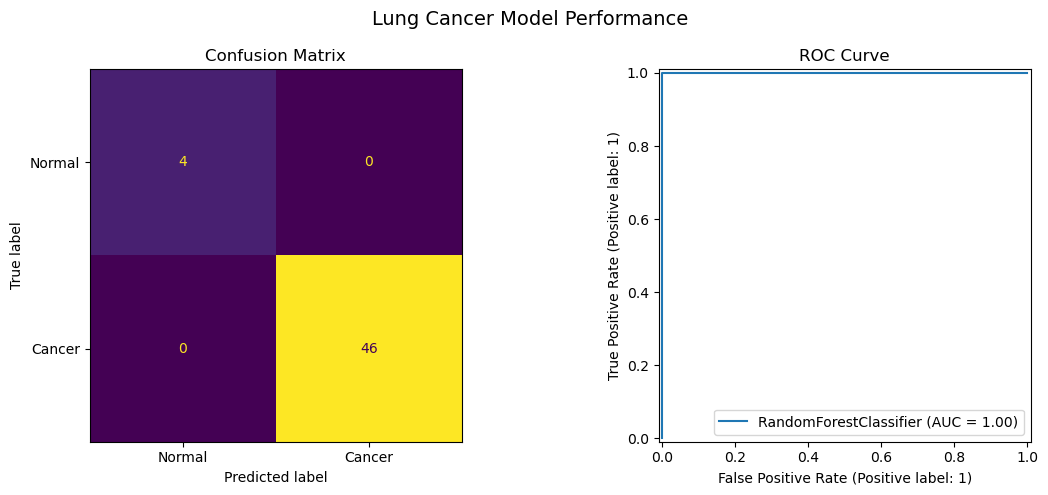


🔥 Top 10 Biomarkers (Lung):
                    Gene  Importance
19392                TEK    0.016192
2485               CCBE1    0.014793
11272       LOC105373738    0.014505
8450               KCNJ8    0.013009
14657             PCAT19    0.011741
17202              SASH1    0.011434
5970                FHL5    0.010778
2859               CDH19    0.010752
5563            FAM189A1    0.009642
6037   FLJ30901///SCUBE1    0.009473


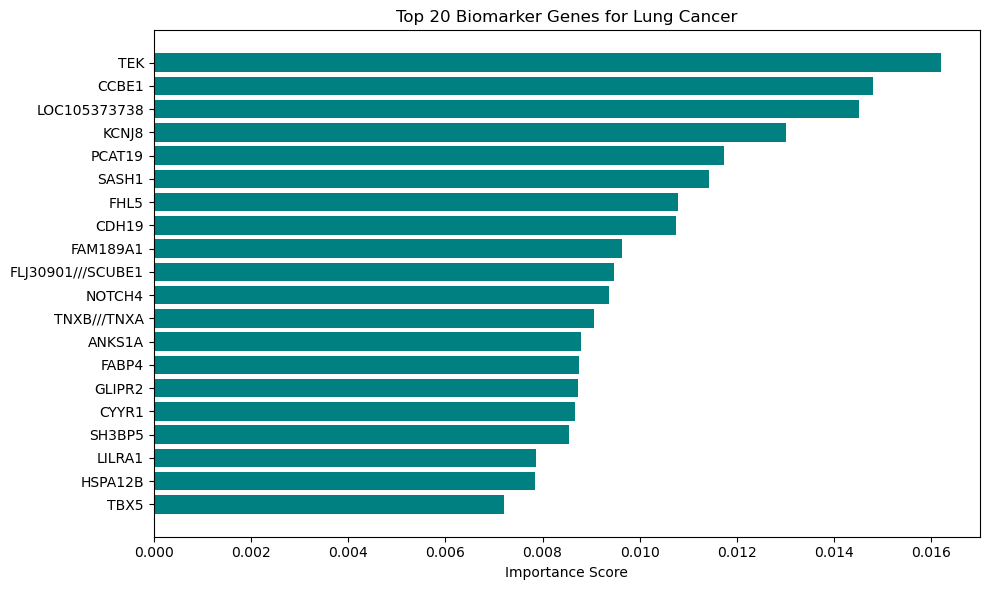


💾 Model saved as: ../models/lung_model.pkl
💾 Top biomarkers saved as: ../outputs/metrics/lung_top100_genes.csv
🎯 Lung model training complete!
🧬 Gene list saved as: ../models/lung_genes.json


In [8]:
# ================================
# Universal Cancer Model Trainer
# Supports: Breast, Ovarian, Lung
# Author: Sindhu S. Patil
# ================================
import os
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay
)
from imblearn.over_sampling import SMOTE

# ----------------------------
# Step 1️⃣: Configuration
# ----------------------------
DATA_DIR = "../data/labeled"
MODEL_DIR = "../models"
METRICS_DIR = "../outputs/metrics"
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(METRICS_DIR, exist_ok=True)

# Choose the disease to train
disease = "lung"  # 🔁 change to 'breast', 'ovarian', or 'lung'

dataset_path = os.path.join(DATA_DIR, f"{disease}_labeled.csv")
print(f"\n🔹 Training model for: {disease.capitalize()}")
print(f"📂 Using dataset: {dataset_path}")

# ----------------------------
# Step 2️⃣: Load Dataset
# ----------------------------
df = pd.read_csv(dataset_path)
X = df.drop(columns=["status"])
y = df["status"]
print(f"✅ Dataset loaded: {df.shape[0]} samples, {df.shape[1]-1} genes")

# ----------------------------
# Step 3️⃣: Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"📊 Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# ----------------------------
# Step 4️⃣: Handle Class Imbalance
# ----------------------------
if disease == "ovarian":
    print("⚖️ Applying class_weight='balanced' (moderate imbalance ~5:1)")
    model = RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    )

elif disease == "lung":
    print("🩸 Applying SMOTE oversampling + class_weight='balanced' (severe imbalance ~11:1)")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    model = RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    )

else:  # Breast - already balanced
    print("✅ Balanced dataset — training directly.")
    model = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )

# ----------------------------
# Step 5️⃣: Train Model
# ----------------------------
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ----------------------------
# Step 6️⃣: Evaluate
# ----------------------------
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print(f"\n✅ Accuracy: {acc:.4f}")
print(f"✅ ROC-AUC: {roc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ----------------------------
# Step 7️⃣: Visualization
# ----------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Normal", "Cancer"]).plot(ax=ax[0], colorbar=False)
ax[0].set_title("Confusion Matrix")

RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve")

plt.suptitle(f"{disease.capitalize()} Cancer Model Performance", fontsize=14)
plt.tight_layout()
plt.show()

# ----------------------------
# Step 8️⃣: Biomarker Extraction
# ----------------------------
feature_importances = pd.DataFrame({
    "Gene": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_genes = feature_importances.head(100)
print(f"\n🔥 Top 10 Biomarkers ({disease.capitalize()}):")
print(top_genes.head(10))

plt.figure(figsize=(10, 6))
plt.barh(top_genes.head(20)["Gene"], top_genes.head(20)["Importance"], color="teal")
plt.gca().invert_yaxis()
plt.title(f"Top 20 Biomarker Genes for {disease.capitalize()} Cancer")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# ----------------------------
# Step 9️⃣: Save Model + Biomarkers
# ----------------------------
joblib.dump(model, f"{MODEL_DIR}/{disease}_model.pkl")
top_genes.to_csv(f"{METRICS_DIR}/{disease}_top100_genes.csv", index=False)

print(f"\n💾 Model saved as: {MODEL_DIR}/{disease}_model.pkl")
print(f"💾 Top biomarkers saved as: {METRICS_DIR}/{disease}_top100_genes.csv")
print(f"🎯 {disease.capitalize()} model training complete!")

# ----------------------------
# Step 🔟: Save Gene List as JSON
# ----------------------------
import json

gene_list = list(X.columns)  # feature order used during training
gene_file_path = f"{MODEL_DIR}/{disease}_genes.json"

with open(gene_file_path, "w") as f:
    json.dump(gene_list, f)

print(f"🧬 Gene list saved as: {gene_file_path}")




🔹 Training model for: Breast
📂 Using dataset: ../data/labeled\breast_labeled.csv
✅ Dataset loaded: 86 samples, 13299 genes
📊 Training samples: 68, Testing samples: 18
✅ Balanced dataset — training directly.

✅ Accuracy: 1.0000
✅ ROC-AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



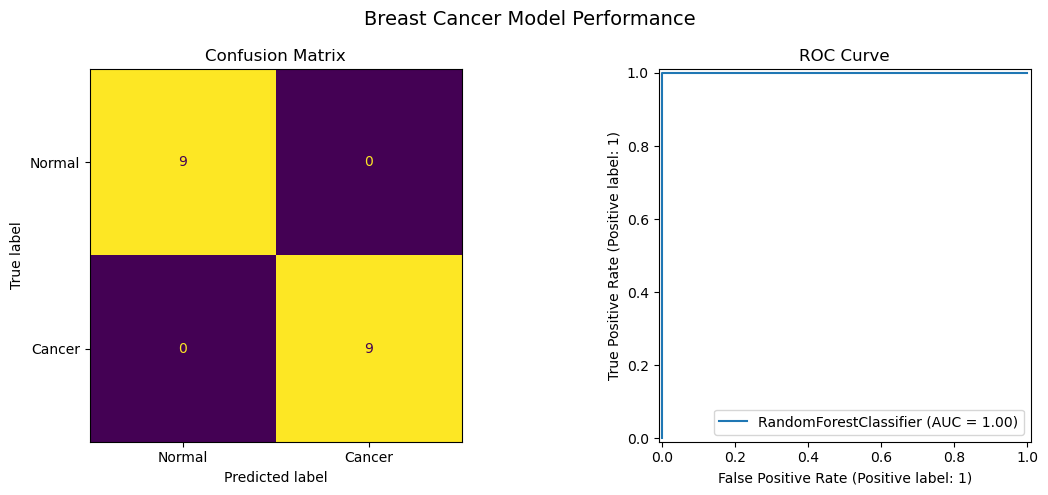


🔥 Top 10 Biomarkers (Breast):
         Gene  Importance
261    ADIPOQ    0.011420
1125     BIN1    0.008713
5954     KRT8    0.008168
5931    KRT19    0.008125
8765     PLK2    0.008075
8334    PCDH9    0.008050
264     ADIRF    0.007499
8761    PLIN1    0.006705
488   ANGPTL4    0.006610
6057      LEP    0.006197


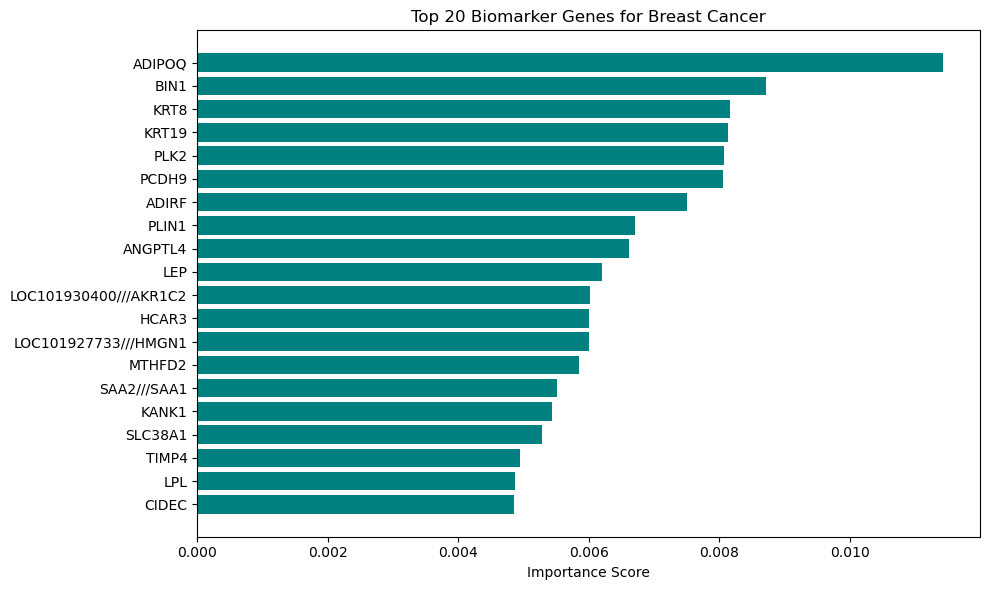


💾 Model saved as: ../models/breast_model.pkl
💾 Top biomarkers saved as: ../outputs/metrics/breast_top100_genes.csv
🎯 Breast model training complete!
🧬 Gene list saved as: ../models/breast_genes.json


In [9]:
# ================================
# Universal Cancer Model Trainer
# Supports: Breast, Ovarian, Lung
# Author: Sindhu S. Patil
# ================================
import os
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay
)
from imblearn.over_sampling import SMOTE

# ----------------------------
# Step 1️⃣: Configuration
# ----------------------------
DATA_DIR = "../data/labeled"
MODEL_DIR = "../models"
METRICS_DIR = "../outputs/metrics"
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(METRICS_DIR, exist_ok=True)

# Choose the disease to train
disease = "breast"  # 🔁 change to 'breast', 'ovarian', or 'lung'

dataset_path = os.path.join(DATA_DIR, f"{disease}_labeled.csv")
print(f"\n🔹 Training model for: {disease.capitalize()}")
print(f"📂 Using dataset: {dataset_path}")

# ----------------------------
# Step 2️⃣: Load Dataset
# ----------------------------
df = pd.read_csv(dataset_path)
X = df.drop(columns=["status"])
y = df["status"]
print(f"✅ Dataset loaded: {df.shape[0]} samples, {df.shape[1]-1} genes")

# ----------------------------
# Step 3️⃣: Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"📊 Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# ----------------------------
# Step 4️⃣: Handle Class Imbalance
# ----------------------------
if disease == "ovarian":
    print("⚖️ Applying class_weight='balanced' (moderate imbalance ~5:1)")
    model = RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    )

elif disease == "lung":
    print("🩸 Applying SMOTE oversampling + class_weight='balanced' (severe imbalance ~11:1)")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    model = RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    )

else:  # Breast - already balanced
    print("✅ Balanced dataset — training directly.")
    model = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )

# ----------------------------
# Step 5️⃣: Train Model
# ----------------------------
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ----------------------------
# Step 6️⃣: Evaluate
# ----------------------------
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print(f"\n✅ Accuracy: {acc:.4f}")
print(f"✅ ROC-AUC: {roc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ----------------------------
# Step 7️⃣: Visualization
# ----------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Normal", "Cancer"]).plot(ax=ax[0], colorbar=False)
ax[0].set_title("Confusion Matrix")

RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve")

plt.suptitle(f"{disease.capitalize()} Cancer Model Performance", fontsize=14)
plt.tight_layout()
plt.show()

# ----------------------------
# Step 8️⃣: Biomarker Extraction
# ----------------------------
feature_importances = pd.DataFrame({
    "Gene": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_genes = feature_importances.head(100)
print(f"\n🔥 Top 10 Biomarkers ({disease.capitalize()}):")
print(top_genes.head(10))

plt.figure(figsize=(10, 6))
plt.barh(top_genes.head(20)["Gene"], top_genes.head(20)["Importance"], color="teal")
plt.gca().invert_yaxis()
plt.title(f"Top 20 Biomarker Genes for {disease.capitalize()} Cancer")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# ----------------------------
# Step 9️⃣: Save Model + Biomarkers
# ----------------------------
joblib.dump(model, f"{MODEL_DIR}/{disease}_model.pkl")
top_genes.to_csv(f"{METRICS_DIR}/{disease}_top100_genes.csv", index=False)

print(f"\n💾 Model saved as: {MODEL_DIR}/{disease}_model.pkl")
print(f"💾 Top biomarkers saved as: {METRICS_DIR}/{disease}_top100_genes.csv")
print(f"🎯 {disease.capitalize()} model training complete!")

# ----------------------------
# Step 🔟: Save Gene List as JSON
# ----------------------------
import json

gene_list = list(X.columns)  # feature order used during training
gene_file_path = f"{MODEL_DIR}/{disease}_genes.json"

with open(gene_file_path, "w") as f:
    json.dump(gene_list, f)

print(f"🧬 Gene list saved as: {gene_file_path}")



In [1]:
# ============================================
# 🔍 Internal Validation of Individual Models
# Sindhu S. Patil — Phase 2 (Step 1)
# ============================================

import os
import pandas as pd
import joblib
from sklearn.model_selection import StratifiedKFold, cross_val_score

# ----------------------------
# Paths and Config
# ----------------------------
DATA_DIR = "../data/labeled"
MODEL_DIR = "../models"

datasets = {
    "breast": f"{DATA_DIR}/breast_labeled.csv",
    "ovarian": f"{DATA_DIR}/ovarian_labeled.csv",
    "lung": f"{DATA_DIR}/lung_labeled.csv"
}

models = {
    "breast": f"{MODEL_DIR}/breast_model.pkl",
    "ovarian": f"{MODEL_DIR}/ovarian_model.pkl",
    "lung": f"{MODEL_DIR}/lung_model.pkl"
}

# ----------------------------
# Validation Function
# ----------------------------
def validate_model(disease, data_path, model_path):
    print(f"\n🧬 Validating {disease.capitalize()} Model")
    print("-" * 45)

    # Load dataset
    df = pd.read_csv(data_path)
    X = df.drop(columns=["status"])
    y = df["status"]

    # Load model
    model = joblib.load(model_path)

    # 5-Fold Cross Validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    acc_scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc")

    print(f"✅ Mean Accuracy: {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
    print(f"✅ Mean ROC-AUC:  {auc_scores.mean():.4f} ± {auc_scores.std():.4f}")

    print(f"📊 Fold-wise Accuracy: {acc_scores}")
    print(f"📊 Fold-wise ROC-AUC:  {auc_scores}")


# ----------------------------
# Validate All Three Models
# ----------------------------
for disease in ["breast", "ovarian", "lung"]:
    validate_model(disease, datasets[disease], models[disease])



🧬 Validating Breast Model
---------------------------------------------
✅ Mean Accuracy: 0.8837 ± 0.0373
✅ Mean ROC-AUC:  0.9562 ± 0.0192
📊 Fold-wise Accuracy: [0.88888889 0.94117647 0.88235294 0.82352941 0.88235294]
📊 Fold-wise ROC-AUC:  [0.91975309 0.97222222 0.95833333 0.95833333 0.97222222]

🧬 Validating Ovarian Model
---------------------------------------------
✅ Mean Accuracy: 1.0000 ± 0.0000
✅ Mean ROC-AUC:  1.0000 ± 0.0000
📊 Fold-wise Accuracy: [1. 1. 1. 1. 1.]
📊 Fold-wise ROC-AUC:  [1. 1. 1. 1. 1.]

🧬 Validating Lung Model
---------------------------------------------
✅ Mean Accuracy: 0.9757 ± 0.0151
✅ Mean ROC-AUC:  0.9868 ± 0.0140
📊 Fold-wise Accuracy: [0.96       0.95918367 0.97959184 0.97959184 1.        ]
📊 Fold-wise ROC-AUC:  [0.96195652 0.98333333 0.98888889 1.         1.        ]


In [5]:
# ===============================================
# 🩷 Extract Top 100 Breast Cancer Biomarker Genes
# Author: Sindhu S. Patil
# ===============================================

import pandas as pd
import os
import joblib

# ------------------------------------------------
# ⚙️ Setup Paths
# ------------------------------------------------
MODEL_PATH = "../models/breast_model.pkl"
DATA_PATH = "../data/labeled/breast_labeled.csv"
OUTPUT_DIR = "../outputs/metrics"

os.makedirs(OUTPUT_DIR, exist_ok=True)

# ------------------------------------------------
# 🔹 Load Trained Model
# ------------------------------------------------
model = joblib.load(MODEL_PATH)
print("✅ Loaded breast model successfully!")

# ------------------------------------------------
# 🔹 Load Labeled Dataset
# ------------------------------------------------
df = pd.read_csv(DATA_PATH)
print(f"📊 Dataset loaded: {df.shape[0]} samples, {df.shape[1]-1} genes")

# Drop target
X = df.drop(columns=["status"])

# ------------------------------------------------
# 🧬 Extract Feature Importances
# ------------------------------------------------
feature_importances = pd.DataFrame({
    "Gene": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_genes = feature_importances.head(100)
print("\n🔥 Top 10 Biomarker Genes:")
print(top_genes.head(10))

# ------------------------------------------------
# 💾 Save Top 100 Genes
# ------------------------------------------------
top_genes_path = f"{OUTPUT_DIR}/breast_top100_genes.csv"
top_genes.to_csv(top_genes_path, index=False)
print(f"\n💾 Top 100 breast biomarker genes saved to: {top_genes_path}")

# ------------------------------------------------
# 📈 Optional: Summary
# ------------------------------------------------
print(f"\n📊 Summary:")
print(f"Total genes ranked: {len(feature_importances)}")
print(f"Top 100 genes extracted and stored successfully!")


✅ Loaded breast model successfully!
📊 Dataset loaded: 86 samples, 13299 genes

🔥 Top 10 Biomarker Genes:
         Gene  Importance
261    ADIPOQ    0.011420
1125     BIN1    0.008713
5954     KRT8    0.008168
5931    KRT19    0.008125
8765     PLK2    0.008075
8334    PCDH9    0.008050
264     ADIRF    0.007499
8761    PLIN1    0.006705
488   ANGPTL4    0.006610
6057      LEP    0.006197

💾 Top 100 breast biomarker genes saved to: ../outputs/metrics/breast_top100_genes.csv

📊 Summary:
Total genes ranked: 13299
Top 100 genes extracted and stored successfully!


In [1]:
import json

gene_list = list(X.columns)

# Save model
with open("../models/breast_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save its gene list
with open("../models/breast_genes.json", "w") as f:
    json.dump(gene_list, f)


NameError: name 'X' is not defined

In [3]:
import joblib

breast = joblib.load("../models/breast_balanced_model.pkl")
ovarian = joblib.load("../models/ovarian_balanced_model.pkl")
lung = joblib.load("../models/lung_balanced_model.pkl")

print("Breast genes:", len(breast.feature_names_in_))
print("Ovarian genes:", len(ovarian.feature_names_in_))
print("Lung genes:", len(lung.feature_names_in_))


Breast genes: 13299
Ovarian genes: 22189
Lung genes: 22189


In [4]:
import pandas as pd

pd.Series(breast.feature_names_in_).to_csv("breast_gene_list.csv", index=False)
pd.Series(ovarian.feature_names_in_).to_csv("ovarian_gene_list.csv", index=False)
pd.Series(lung.feature_names_in_).to_csv("lung_gene_list.csv", index=False)
